# LHC bulk ensemble behavior figures

Here I plot the "bulk" model behavior, including averages, envelopes, statistical moments, and histograms/PDFs.

## Setup

In [3]:
import sys
import datetime
import os

import numpy as np
import matplotlib.pyplot as plt 
import matplotlib as mpl
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina' 

# plotting parameters
node_times = [2020, 2030, 2060, 2100, 2150, 2200]
x_label = 'Year'

# plotting lists
color_list = ['#000000', '#E69F00', '#56B4E9', '#009E73', '#F0E442', '#0072B2', '#D55E00', '#CC79A7'] * 4
marker_list = ['o', 's', 'P', '*', '<', 'v', '>', 'p'] * 4
linestyle_list = ['solid'] * 8 + ['dashdot'] * 8 + ['dashed'] * 8 + ['dotted'] * 8

# dictionaries of params
cdds_params={'axes.linewidth': 3,
 'axes.axisbelow': False,
 'axes.edgecolor': 'black',
 'axes.facecolor': 'None',
 'axes.grid': False,
 'axes.labelcolor': 'black',
 'axes.spines.right': False,
 'axes.spines.top': False,
 'axes.titlesize': 20,
 'axes.labelsize': 20,
 'axes.titlelocation': 'left',
 'figure.facecolor': 'white',
 'figure.figsize': (18, 10),
 'lines.solid_capstyle': 'round',
 'lines.linewidth': 2.5,
 'patch.edgecolor': 'w',
 'patch.force_edgecolor': True,
 'text.color': 'black',
 'legend.frameon': False,
 'xtick.bottom': True,
 'xtick.major.width': 3,
 'xtick.major.size': 6,
 'xtick.color': 'black',
 'xtick.direction': 'out',
 'xtick.top': False,
 'ytick.color': 'black',
 'ytick.direction': 'out',
 'ytick.left': True,
 'ytick.right': False,
 'ytick.color' : 'black',
 'ytick.major.width': 3, 
 'ytick.major.size': 6,
 'axes.prop_cycle': plt.cycler(linestyle=linestyle_list),
 'font.size': 16,
 'font.family': 'serif'}

plt.rcParams.update(cdds_params)

# make base filename
today = datetime.datetime.now()
year = str(today.year)
day = str(today.day)
month = str(today.month)

basefile = ''.join(["/data/keeling/a/adammb4/ClimateEcon/ez-climate/TCREZClimate/docs/figdump/", month, '-', day, '-', year, '-'])

## Save figs?!

In [4]:
save_figs = True

## Import parameter values and data

In [5]:
def remove_nans(ssp_paths_and_util, exp_m, temp_paths, co2_paths, dam_paths, params):
    c2020, c2030, c2060, c2100, c2150, c2200, util = ssp_paths_and_util.T
    paths = ssp_paths_and_util[:, :-1]
    unphys_util_vals = util > 15
    c2020 = c2020[~unphys_util_vals]
    c2030 = c2030[~unphys_util_vals]
    c2060 = c2060[~unphys_util_vals]
    c2100 = c2100[~unphys_util_vals]
    c2150 = c2150[~unphys_util_vals]
    c2200 = c2200[~unphys_util_vals]
    util = util[~unphys_util_vals]
    paths = paths[~unphys_util_vals]
    params = params[~unphys_util_vals]
    exp_m = exp_m[~unphys_util_vals]
    temp = temp_paths[~unphys_util_vals]
    co2 = co2_paths[~unphys_util_vals]
    dam = dam_paths[~unphys_util_vals]
    return paths[~np.isnan(util)], c2020[~np.isnan(util)], c2030[~np.isnan(util)], c2060[~np.isnan(util)], c2100[~np.isnan(util)], c2150[~np.isnan(util)], c2200[~np.isnan(util)], util[~np.isnan(util)], params[~np.isnan(util)], exp_m[~np.isnan(util)], temp[~np.isnan(util)], co2[~np.isnan(util)], dam[~np.isnan(util)]

path = os.path.abspath('')

# sampled parameter values
params = np.genfromtxt(''.join([path, '/data/BPW_LHC_samples_N1000_DIMS5.csv']), delimiter=',')

# pull data from diff files 
# RENAME AFTER NEW RUNS -- I ADDED AN N TO THE FILE NAME TO SIGNAL HOW MANY DRAWS I TOOK :)
ssp5_paths_and_util = np.genfromtxt(''.join([path, '/data/lhc_sampling_paths_ssp5_N1000.csv']), delimiter=',')
ssp5_exp_m = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_m_ssp5_N1000.csv']), delimiter=',')
ssp5_temp = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_T_ssp5_N1000.csv']), delimiter=',')
ssp5_co2 = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_conc_ssp5_N1000.csv']), delimiter=',')
ssp5_dam = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_dam_ssp5_N1000.csv']), delimiter=',')
ssp5_cpaths, ssp5_c2020, ssp5_c2030, ssp5_c2060, ssp5_c2100, ssp5_c2150, ssp5_c2200, ssp5_util, ssp5_params, ssp5_exp_m, ssp5_exp_T, ssp5_exp_conc, ssp5_exp_dam = remove_nans(ssp5_paths_and_util, ssp5_exp_m, ssp5_temp, ssp5_co2, ssp5_dam, params)
ssp5_ra, ssp5_eis, ssp5_ex, ssp5_end, ssp5_prtp = ssp5_params.T

ssp4_paths_and_util = np.genfromtxt(''.join([path, '/data/lhc_sampling_paths_ssp4_N1000.csv']), delimiter=',')
ssp4_exp_m = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_m_ssp4_N1000.csv']), delimiter=',')
ssp4_temp = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_T_ssp4_N1000.csv']), delimiter=',')
ssp4_co2 = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_conc_ssp4_N1000.csv']), delimiter=',')
ssp4_dam = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_dam_ssp4_N1000.csv']), delimiter=',')
ssp4_cpaths, ssp4_c2020, ssp4_c2030, ssp4_c2060, ssp4_c2100, ssp4_c2150, ssp4_c2200, ssp4_util, ssp4_params, ssp4_exp_m, ssp4_exp_T, ssp4_exp_conc, ssp4_exp_dam = remove_nans(ssp4_paths_and_util, ssp4_exp_m, ssp4_temp, ssp4_co2, ssp4_dam, params)
ssp4_ra, ssp4_eis, ssp4_ex, ssp4_end, ssp4_prtp = ssp4_params.T

ssp3_paths_and_util = np.genfromtxt(''.join([path, '/data/lhc_sampling_paths_ssp3_N1000.csv']), delimiter=',')
ssp3_exp_m = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_m_ssp3_N1000.csv']), delimiter=',')
ssp3_temp = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_T_ssp3_N1000.csv']), delimiter=',')
ssp3_co2 = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_conc_ssp3_N1000.csv']), delimiter=',')
ssp3_dam = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_dam_ssp3_N1000.csv']), delimiter=',')
ssp3_cpaths, ssp3_c2020, ssp3_c2030, ssp3_c2060, ssp3_c2100, ssp3_c2150, ssp3_c2200, ssp3_util, ssp3_params, ssp3_exp_m, ssp3_exp_T, ssp3_exp_conc, ssp3_exp_dam = remove_nans(ssp3_paths_and_util, ssp3_exp_m, ssp3_temp, ssp3_co2, ssp3_dam, params)
ssp3_ra, ssp3_eis, ssp3_ex, ssp3_end, ssp3_prtp = ssp3_params.T

ssp2_paths_and_util = np.genfromtxt(''.join([path, '/data/lhc_sampling_paths_ssp2_N1000.csv']), delimiter=',')
ssp2_exp_m = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_m_ssp2_N1000.csv']), delimiter=',')
ssp2_temp = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_T_ssp2_N1000.csv']), delimiter=',')
ssp2_co2 = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_conc_ssp2_N1000.csv']), delimiter=',')
ssp2_dam = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_dam_ssp2_N1000.csv']), delimiter=',')
ssp2_cpaths, ssp2_c2020, ssp2_c2030, ssp2_c2060, ssp2_c2100, ssp2_c2150, ssp2_c2200, ssp2_util, ssp2_params, ssp2_exp_m, ssp2_exp_T, ssp2_exp_conc, ssp2_exp_dam = remove_nans(ssp2_paths_and_util, ssp2_exp_m, ssp2_temp, ssp2_co2, ssp2_dam, params)
ssp2_ra, ssp2_eis, ssp2_ex, ssp2_end, ssp2_prtp = ssp2_params.T

ssp1_paths_and_util = np.genfromtxt(''.join([path, '/data/lhc_sampling_paths_ssp1_N1000.csv']), delimiter=',')
ssp1_exp_m = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_m_ssp1_N1000.csv']), delimiter=',')
ssp1_temp = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_T_ssp1_N1000.csv']), delimiter=',')
ssp1_co2 = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_conc_ssp1_N1000.csv']), delimiter=',')
ssp1_dam = np.genfromtxt(''.join([path, '/data/lhc_sampling_exp_dam_ssp1_N1000.csv']), delimiter=',')
ssp1_cpaths, ssp1_c2020, ssp1_c2030, ssp1_c2060, ssp1_c2100, ssp1_c2150, ssp1_c2200, ssp1_util, ssp1_params, ssp1_exp_m, ssp1_exp_T, ssp1_exp_conc, ssp1_exp_dam = remove_nans(ssp1_paths_and_util, ssp1_exp_m, ssp1_temp, ssp1_co2, ssp1_dam, params)
ssp1_ra, ssp1_eis, ssp1_ex, ssp1_end, ssp1_prtp = ssp1_params.T

### Check plots

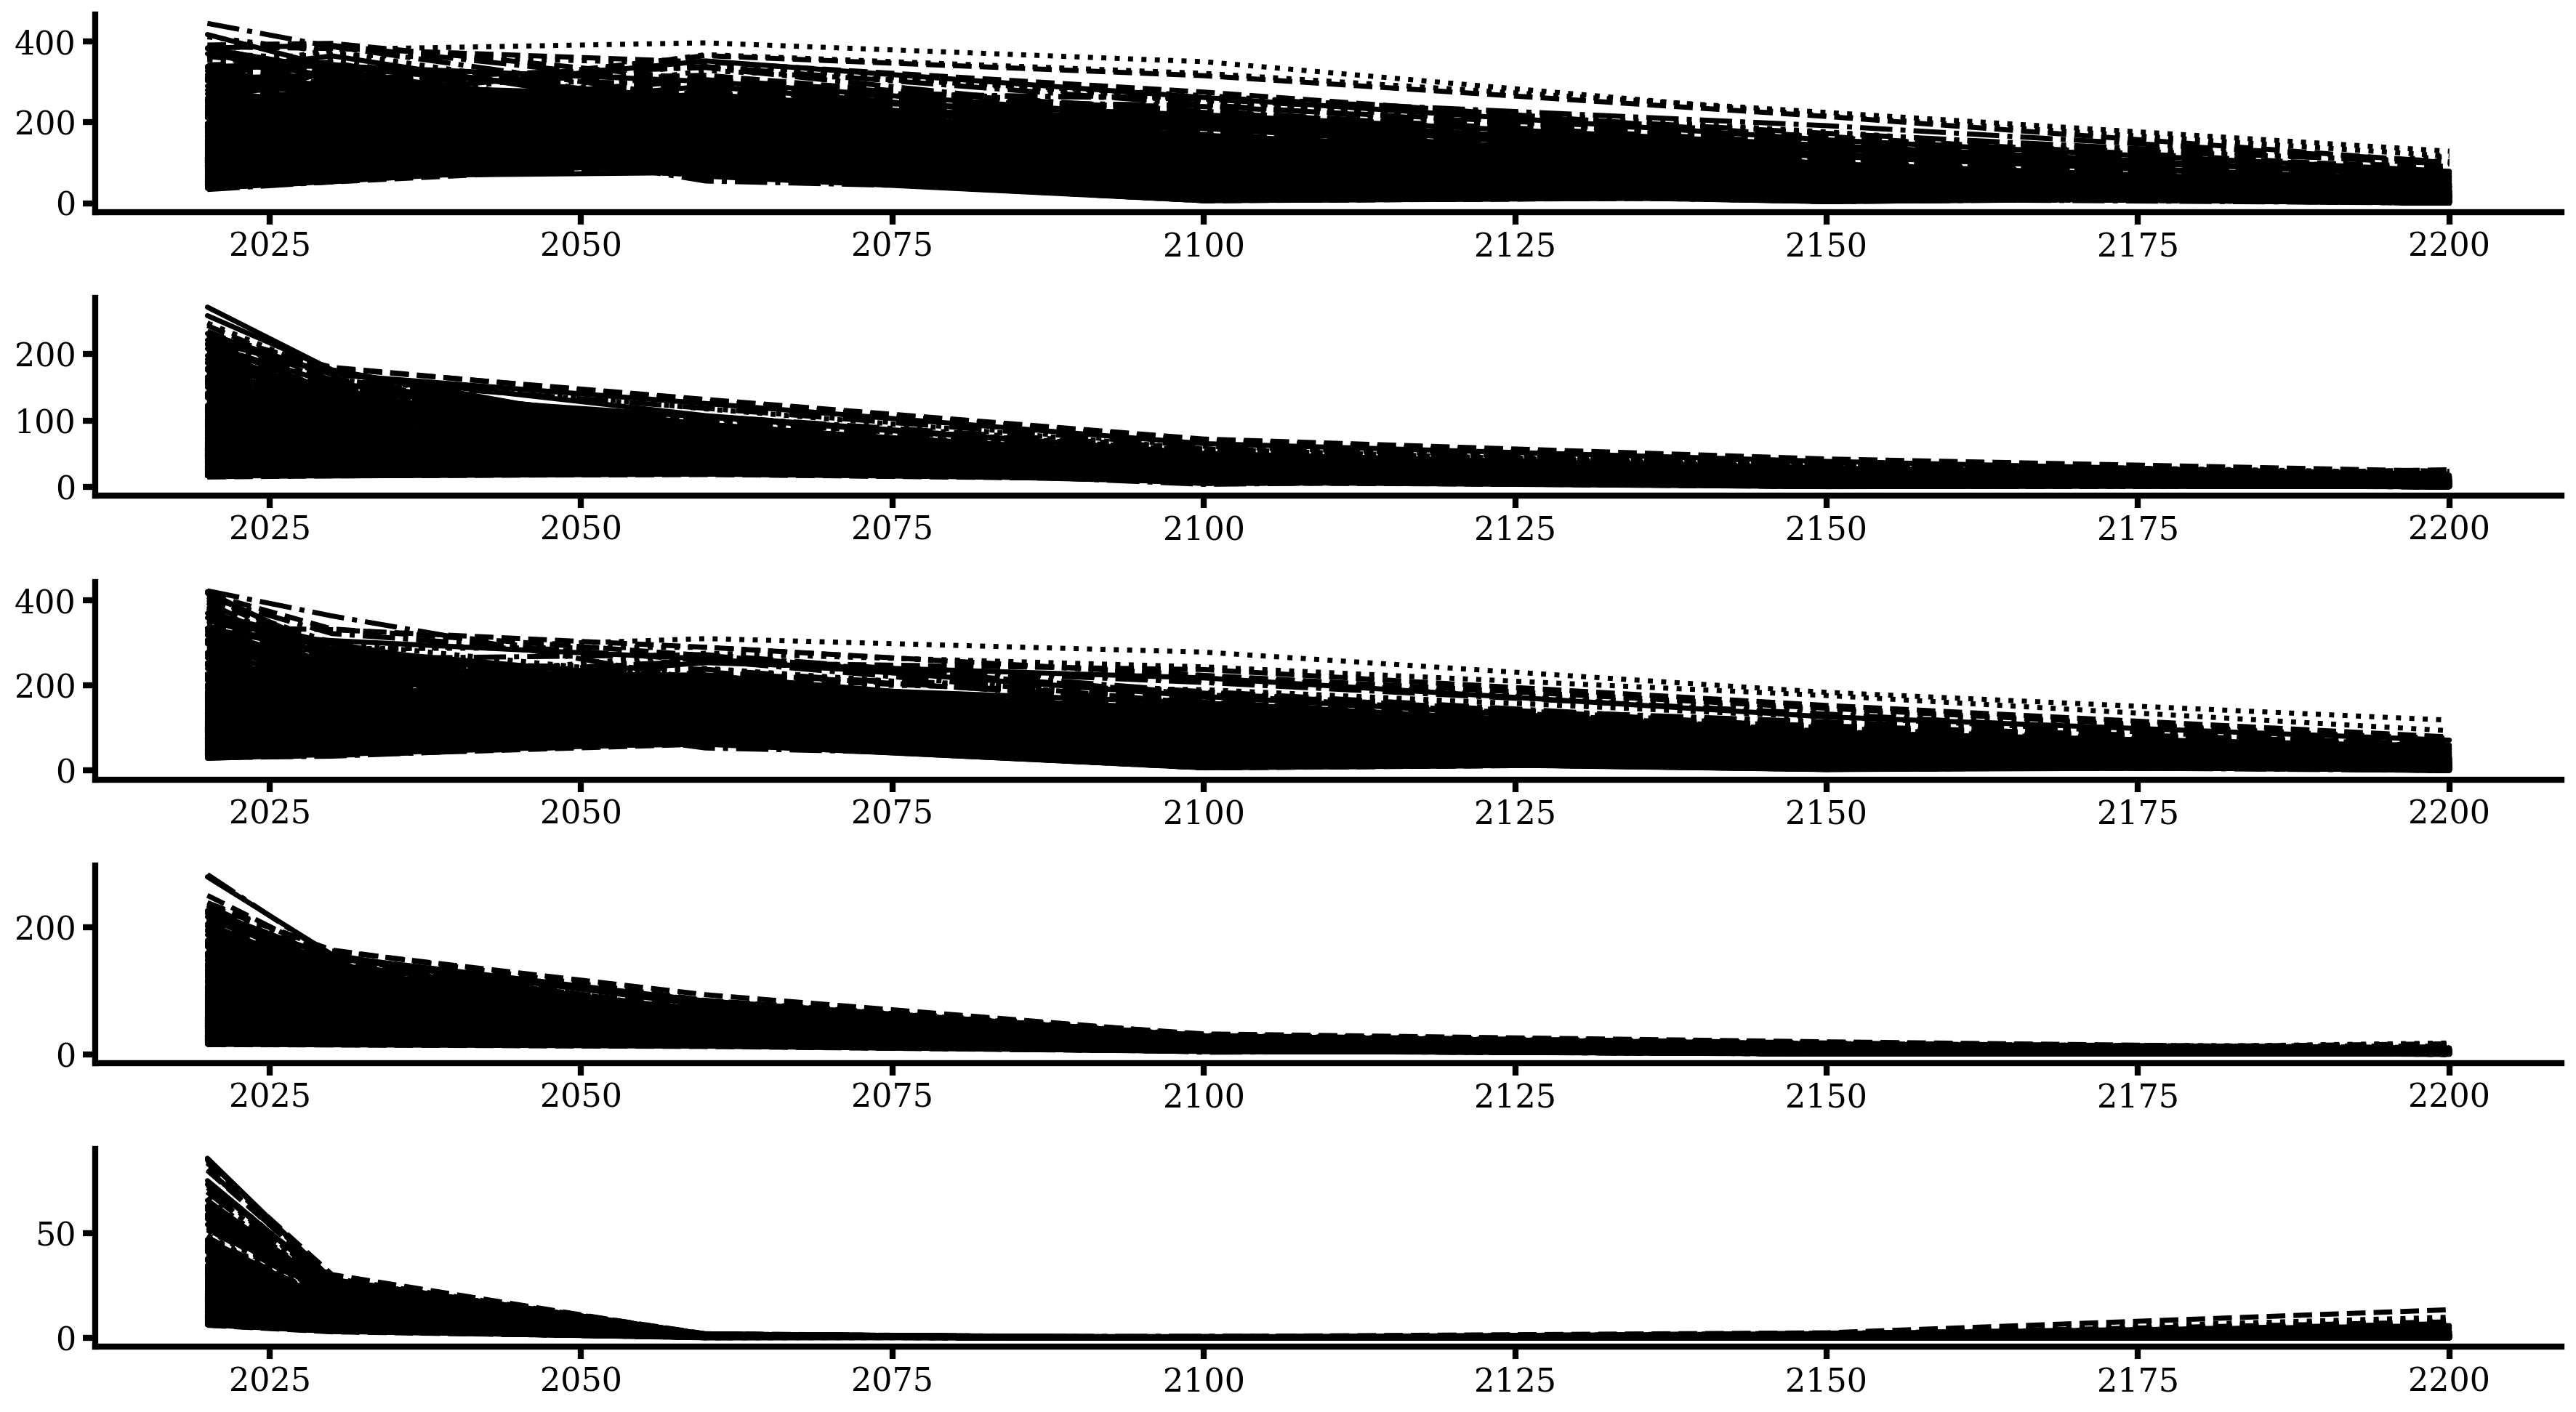

In [6]:
fig, ax = plt.subplots(5)

for i in range(len(ssp5_util)):
    ax[0].plot(node_times, ssp5_cpaths[i])
    
for i in range(len(ssp4_util)):
    ax[1].plot(node_times, ssp4_cpaths[i])
    
for i in range(len(ssp3_util)):
    ax[2].plot(node_times, ssp3_cpaths[i])
    
for i in range(len(ssp2_util)):
    ax[3].plot(node_times, ssp2_cpaths[i])
    
for i in range(len(ssp1_util)):          
    ax[4].plot(node_times, ssp1_cpaths[i])
    
fig.tight_layout()

In [7]:
len(ssp5_cpaths), len(ssp4_c2100)

(862, 858)

# Ensemble variables in grid 

"Post it note" plot! 

In [8]:
def compute_std_in_time(paths):
    c2020, c2030, c2060, c2100, c2150, c2200 = paths.T
    return np.array([np.std(c2020), np.std(c2030), np.std(c2060), np.std(c2100), np.std(c2150), np.std(c2200)])

def make_row(ax, row_inds, ssp5_path, ssp4_path, ssp3_path, ssp2_path, ssp1_path, bw, lw, cinds, return_lines, 
             dam=False, temp=False, conc=False):
    ssp5_cind, ssp4_cind, ssp3_cind, ssp2_cind, ssp1_cind = cinds
    ssp5_ind, ssp4_ind, ssp3_ind, ssp2_ind, ssp1_ind, var_ind = row_inds
    if conc:
        LB = 300
        UB = 700
    elif temp:
        LB = 0.8
        UB = 4.1
    elif dam:
        LB = 0
        UB = 15.1
    else:
        UB = 500
        LB = 0
    
    if dam:
        ssp5_2020, ssp5_2030, ssp5_2060, ssp5_2100, ssp5_2150, ssp5_2200 = ssp5_path.T * 100
        ssp4_2020, ssp4_2030, ssp4_2060, ssp4_2100, ssp4_2150, ssp4_2200 = ssp4_path.T * 100
        ssp3_2020, ssp3_2030, ssp3_2060, ssp3_2100, ssp3_2150, ssp3_2200 = ssp3_path.T * 100
        ssp2_2020, ssp2_2030, ssp2_2060, ssp2_2100, ssp2_2150, ssp2_2200 = ssp2_path.T * 100
        ssp1_2020, ssp1_2030, ssp1_2060, ssp1_2100, ssp1_2150, ssp1_2200 = ssp1_path.T * 100
        ssp5_max = np.max((ssp5_2020, ssp5_2030, ssp5_2060, ssp5_2100, ssp5_2150, ssp5_2200))
        ssp4_max = np.max((ssp4_2020, ssp4_2030, ssp4_2060, ssp4_2100, ssp4_2150, ssp4_2200))
        ssp3_max = np.max((ssp3_2020, ssp3_2030, ssp3_2060, ssp3_2100, ssp3_2150, ssp3_2200))
        ssp2_max = np.max((ssp2_2020, ssp2_2030, ssp2_2060, ssp2_2100, ssp2_2150, ssp2_2200))
        ssp1_max = np.max((ssp1_2020, ssp1_2030, ssp1_2060, ssp1_2100, ssp1_2150, ssp1_2200))
        #UB = np.max([ssp5_max, ssp4_max, ssp3_max, ssp2_max, ssp1_max]) + 2.5

        ssp5_std = compute_std_in_time(ssp5_path) * 100
        ssp4_std = compute_std_in_time(ssp4_path) * 100
        ssp3_std = compute_std_in_time(ssp3_path) * 100
        ssp2_std = compute_std_in_time(ssp2_path) * 100
        ssp1_std = compute_std_in_time(ssp1_path) * 100

        ssp5_mean = np.mean(ssp5_path, axis=0) * 100
        ssp4_mean = np.mean(ssp4_path, axis=0) * 100
        ssp3_mean = np.mean(ssp3_path, axis=0) * 100
        ssp2_mean = np.mean(ssp2_path, axis=0) * 100
        ssp1_mean = np.mean(ssp1_path, axis=0) * 100
    
    else:
        ssp5_2020, ssp5_2030, ssp5_2060, ssp5_2100, ssp5_2150, ssp5_2200 = ssp5_path.T
        ssp4_2020, ssp4_2030, ssp4_2060, ssp4_2100, ssp4_2150, ssp4_2200 = ssp4_path.T
        ssp3_2020, ssp3_2030, ssp3_2060, ssp3_2100, ssp3_2150, ssp3_2200 = ssp3_path.T
        ssp2_2020, ssp2_2030, ssp2_2060, ssp2_2100, ssp2_2150, ssp2_2200 = ssp2_path.T
        ssp1_2020, ssp1_2030, ssp1_2060, ssp1_2100, ssp1_2150, ssp1_2200 = ssp1_path.T
        ssp5_max = np.max((ssp5_2020, ssp5_2030, ssp5_2060, ssp5_2100, ssp5_2150, ssp5_2200))
        ssp4_max = np.max((ssp4_2020, ssp4_2030, ssp4_2060, ssp4_2100, ssp4_2150, ssp4_2200))
        ssp3_max = np.max((ssp3_2020, ssp3_2030, ssp3_2060, ssp3_2100, ssp3_2150, ssp3_2200))
        ssp2_max = np.max((ssp2_2020, ssp2_2030, ssp2_2060, ssp2_2100, ssp2_2150, ssp2_2200))
        ssp1_max = np.max((ssp1_2020, ssp1_2030, ssp1_2060, ssp1_2100, ssp1_2150, ssp1_2200))
        #UB = np.max([ssp5_max, ssp4_max, ssp3_max, ssp2_max, ssp1_max])

        ssp5_std = compute_std_in_time(ssp5_path)
        ssp4_std = compute_std_in_time(ssp4_path)
        ssp3_std = compute_std_in_time(ssp3_path)
        ssp2_std = compute_std_in_time(ssp2_path)
        ssp1_std = compute_std_in_time(ssp1_path)

        ssp5_mean = np.mean(ssp5_path, axis=0)
        ssp4_mean = np.mean(ssp4_path, axis=0)
        ssp3_mean = np.mean(ssp3_path, axis=0)
        ssp2_mean = np.mean(ssp2_path, axis=0)
        ssp1_mean = np.mean(ssp1_path, axis=0)
    
    ssp5, = ax[ssp5_ind].plot(node_times, ssp5_mean, color=color_list[ssp5_cind], lw=4, label="SSP5")
    ax[ssp5_ind].boxplot(ssp5_2020, positions=[2020], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp5_cind], lw=lw),
               medianprops=dict(color='r', lw=lw))
    ax[ssp5_ind].boxplot(ssp5_2030, positions=[2030], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp5_cind], lw=lw),
               medianprops=dict(color='r', lw=lw))
    ax[ssp5_ind].boxplot(ssp5_2060, positions=[2060], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp5_cind], lw=lw),
               medianprops=dict(color='r', lw=lw))
    ax[ssp5_ind].boxplot(ssp5_2100, positions=[2100], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp5_cind], lw=lw),
               medianprops=dict(color='r', lw=lw))
    ax[ssp5_ind].boxplot(ssp5_2150, positions=[2150], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp5_cind], lw=lw),
               medianprops=dict(color='r', lw=lw))
    ax[ssp5_ind].boxplot(ssp5_2200, positions=[2200], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp5_cind], lw=lw),
               medianprops=dict(color='r', lw=lw))
    ax[ssp5_ind].set_xticks([2020, 2100, 2200])
    ax[ssp5_ind].set_ylim((LB, UB))

    ssp4, = ax[ssp4_ind].plot(node_times, ssp4_mean, color=color_list[ssp4_cind], lw=4, label="SSP4")
    ax[ssp4_ind].boxplot(ssp4_2020, positions=[2020], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp4_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp4_ind].boxplot(ssp4_2030, positions=[2030], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp4_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp4_ind].boxplot(ssp4_2060, positions=[2060], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp4_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp4_ind].boxplot(ssp4_2100, positions=[2100], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp4_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp4_ind].boxplot(ssp4_2150, positions=[2150], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp4_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp4_ind].boxplot(ssp4_2200, positions=[2200], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp4_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp4_ind].set_xticks([2020, 2100, 2200])
    ax[ssp4_ind].set_ylim((LB, UB))

    ssp3, = ax[ssp3_ind].plot(node_times, ssp3_mean, color=color_list[ssp3_cind], lw=4, label="SSP3")
    ax[ssp3_ind].boxplot(ssp3_2020, positions=[2020], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp3_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp3_ind].boxplot(ssp3_2030, positions=[2030], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp3_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp3_ind].boxplot(ssp3_2060, positions=[2060], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp3_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp3_ind].boxplot(ssp3_2100, positions=[2100], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp3_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp3_ind].boxplot(ssp3_2150, positions=[2150], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp3_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp3_ind].boxplot(ssp3_2200, positions=[2200], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp3_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp3_ind].set_xticks([2020, 2100, 2200])
    ax[ssp3_ind].set_ylim((LB, UB))

    ssp2, = ax[ssp2_ind].plot(node_times, ssp2_mean, color=color_list[ssp2_cind], lw=4, label="SSP2")
    ax[ssp2_ind].boxplot(ssp2_2020, positions=[2020], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp2_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp2_ind].boxplot(ssp2_2030, positions=[2030], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp2_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp2_ind].boxplot(ssp2_2060, positions=[2060], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp2_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp2_ind].boxplot(ssp2_2100, positions=[2100], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp2_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp2_ind].boxplot(ssp2_2150, positions=[2150], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp2_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp2_ind].boxplot(ssp2_2200, positions=[2200], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp2_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp2_ind].set_xticks([2020, 2100, 2200])
    ax[ssp2_ind].set_ylim((LB, UB))

    ssp1, = ax[ssp1_ind].plot(node_times, ssp1_mean, color=color_list[ssp1_cind], lw=4, label="SSP1")
    ax[ssp1_ind].boxplot(ssp1_2020, positions=[2020], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp1_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp1_ind].boxplot(ssp1_2030, positions=[2030], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp1_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp1_ind].boxplot(ssp1_2060, positions=[2060], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp1_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp1_ind].boxplot(ssp1_2100, positions=[2100], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp1_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp1_ind].boxplot(ssp1_2150, positions=[2150], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp1_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp1_ind].boxplot(ssp1_2200, positions=[2200], widths=bw, patch_artist=True, 
               boxprops=dict(facecolor=color_list[ssp1_cind], lw=lw),
               medianprops=dict(color='k', lw=lw))
    ax[ssp1_ind].set_xticks([2020, 2100, 2200])
    ax[ssp1_ind].set_ylim((LB, UB))
    
    ax[var_ind].plot(node_times, ssp5_std, color=color_list[ssp5_cind])
    ax[var_ind].plot(node_times, ssp4_std, color=color_list[ssp4_cind])
    ax[var_ind].plot(node_times, ssp3_std, color=color_list[ssp3_cind])
    ax[var_ind].plot(node_times, ssp2_std, color=color_list[ssp2_cind])
    ax[var_ind].plot(node_times, ssp1_std, color=color_list[ssp1_cind])
    if temp:
        ax[var_ind].set_ylim((0,0.6))
    elif conc:
        ax[var_ind].set_ylim((0, 80))
    elif dam:
        ax[var_ind].set_ylim((0, 2))
    else:
        ax[var_ind].set_ylim((0, 80))
    if return_lines:
        return ssp5, ssp4, ssp3, ssp2, ssp1

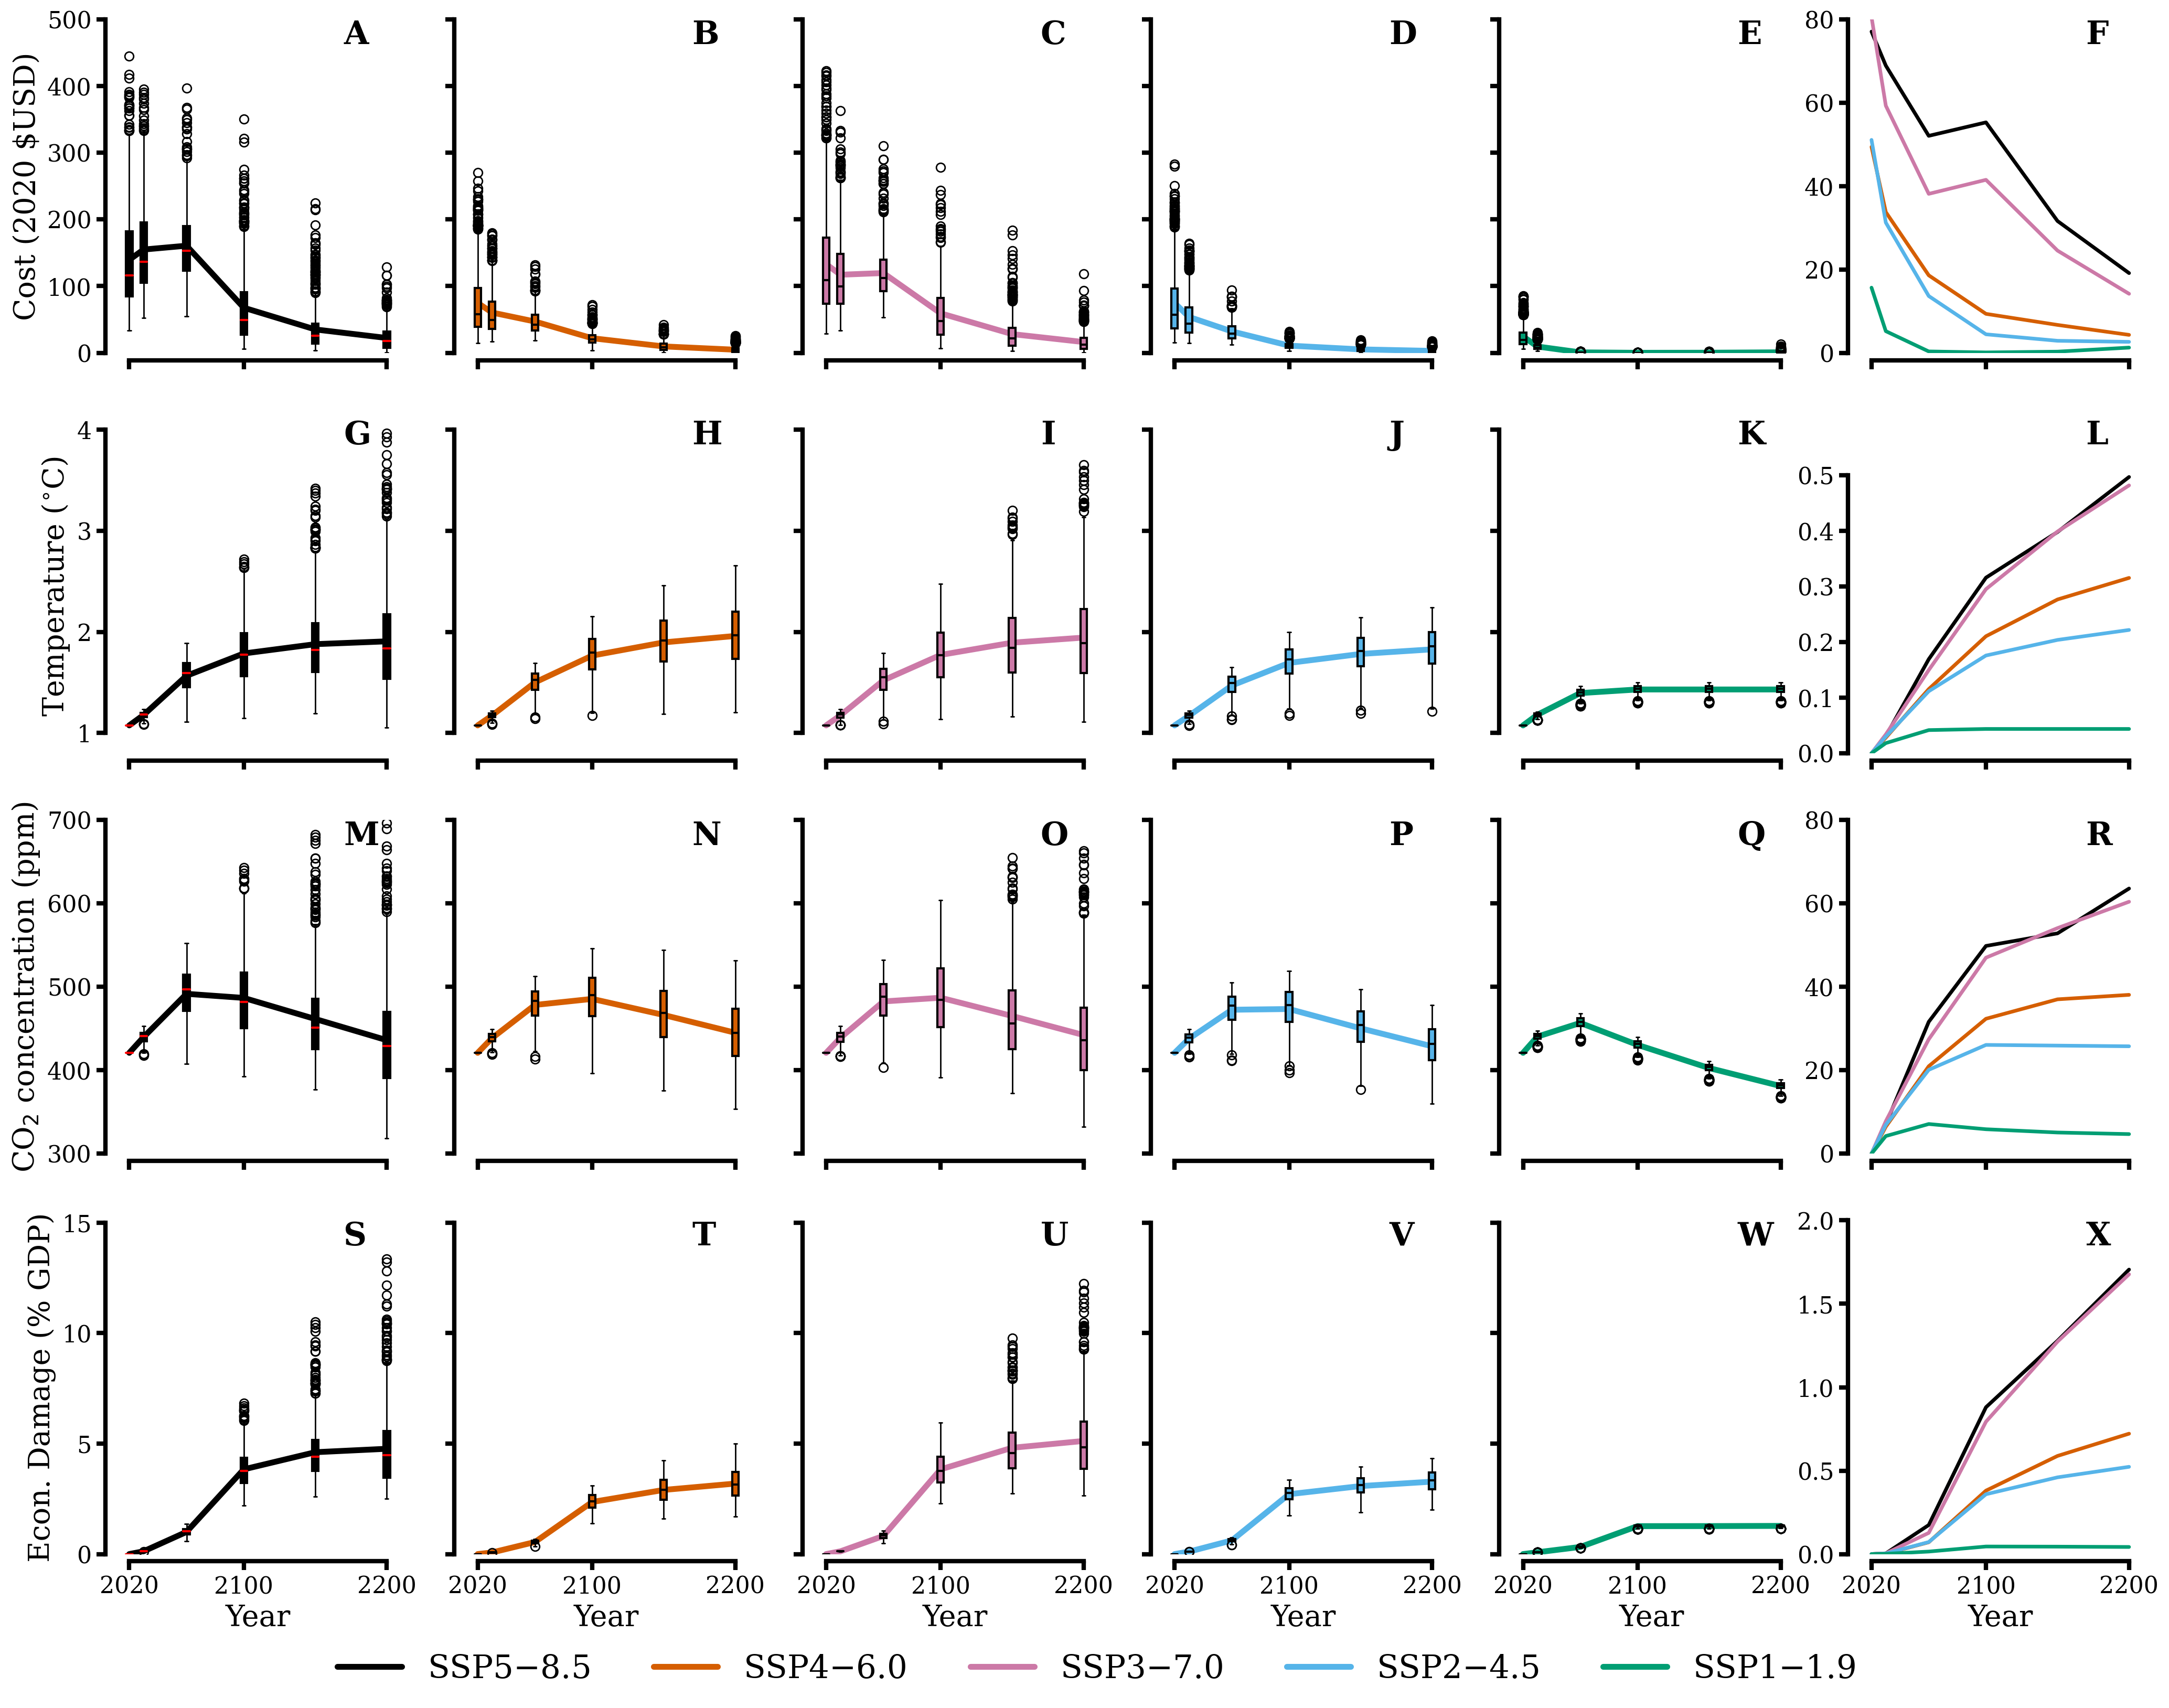

In [9]:
import matplotlib.transforms as mtransforms

bw = 4.5
lw = 1.5

ssp5_cind = 0
ssp4_cind = 6
ssp3_cind = 7
ssp2_cind = 2
ssp1_cind = 3
cinds = [ssp5_cind, ssp4_cind, ssp3_cind, ssp2_cind, ssp1_cind]

cost_row = ['A', 'B', 'C', 'D', 'E', 'F']
t_row = ['G', 'H', 'I', 'J', 'K', 'L']
conc_row = ['M', 'N', 'O', 'P', 'Q', 'R']
dam_row = ['S', 'T', 'U', 'V', 'W', 'X']

fig, ax = plt.subplot_mosaic([cost_row, t_row, conc_row, dam_row], sharex=True,
                             gridspec_kw={'height_ratios': [1, 1, 1, 1], 'width_ratios': [1, 1, 1, 1, 1, 1]},
                            figsize=(25,19))

ssp5, ssp4, ssp3, ssp2, ssp1 = make_row(ax, cost_row, ssp5_cpaths, ssp4_cpaths, ssp3_cpaths, ssp2_cpaths, ssp1_cpaths, 
         bw, lw, cinds, return_lines=True)

make_row(ax, t_row, ssp5_exp_T, ssp4_exp_T, ssp3_exp_T, ssp2_exp_T, ssp1_exp_T, 
         bw, lw, cinds, return_lines=True, dam=False, temp=True)

make_row(ax, conc_row, ssp5_exp_conc, ssp4_exp_conc, ssp3_exp_conc, ssp2_exp_conc, ssp1_exp_conc, 
         bw, lw, cinds, return_lines=True, dam=False, temp=False, conc=True)

make_row(ax, dam_row, ssp5_exp_dam, ssp4_exp_dam, ssp3_exp_dam, ssp2_exp_dam, ssp1_exp_dam, 
         bw, lw, cinds, return_lines=True, dam=True)

ax['A'].set_ylabel("Cost (2020 $USD)")
ax['G'].set_ylabel("Temperature ($^{\circ}$C)")
ax['M'].set_ylabel("CO$_2$ concentration (ppm)")
ax['S'].set_ylabel("Econ. Damage (% GDP)")

# turn off y labels
turn_off_ylabels = ['B', 'C', 'D', 'E', 'H', 'I', 'J', 'K', 'N', 'O', 'P', 'Q', 'T', 'U', 'V', 'W']
for i in turn_off_ylabels:
    ax[i].set_yticklabels([])
    
# make x axis label
for i in dam_row:
    ax[i].set_xlabel("Year")
    ax[i].set_xticklabels(['2020', '2100', '2200'])
    
    
for i in dam_row[:-1]:
    ax[i].set_yticks([0, 5, 10, 15])
    
for i in t_row[:-1]:
    ax[i].set_yticks([1,2,3,4])
    
for i in conc_row[:-1]:
    ax[i].set_yticks([300, 400, 500, 600, 700])
    
for i in cost_row[:-1]:
    ax[i].set_yticks([0, 100, 200, 300, 400, 500])

# label panels
for label, ax in ax.items():
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(2.2, 0.0, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans, fontsize=22, fontweight='bold',
            verticalalignment='top', bbox=dict(facecolor='none', edgecolor='none', pad=1))
    
fig.legend([ssp5, ssp4, ssp3, ssp2, ssp1], ["SSP5$-$8.5", "SSP4$-$6.0", "SSP3$-$7.0", "SSP2$-$4.5", "SSP1$-$1.9"], bbox_to_anchor=(0.5, 0.03),
      loc='lower center', ncol=5, fancybox=True, shadow=True, fontsize=22)

sns.despine(offset=5, trim=True)

if save_figs:
    fig.savefig(''.join([basefile, "box-whisker-paths-CTCoD.png"]), dpi=400, bbox_inches="tight")    

# Quartile ranges

In [10]:
def compute_std_in_time(paths):
    c2020, c2030, c2060, c2100, c2150, c2200 = paths.T
    return np.array([np.std(c2020), np.std(c2030), np.std(c2060), np.std(c2100), np.std(c2150), np.std(c2200)])

def make_row(ax, row_inds, ssp5_path, ssp4_path, ssp3_path, ssp2_path, ssp1_path, bw, lw, cinds, return_lines, 
             dam=False, temp=False, conc=False):
    ssp5_cind, ssp4_cind, ssp3_cind, ssp2_cind, ssp1_cind = cinds
    ssp5_ind, ssp4_ind, ssp3_ind, ssp2_ind, ssp1_ind, var_ind = row_inds
    if conc:
        LB = 300
        UB = 700
    elif temp:
        LB = 0.8
        UB = 4.1
    elif dam:
        LB = 0
        UB = 10.5
    else:
        UB = 400
        LB = 0
    
    if dam:
        ssp5_2020, ssp5_2030, ssp5_2060, ssp5_2100, ssp5_2150, ssp5_2200 = ssp5_path.T * 100
        ssp4_2020, ssp4_2030, ssp4_2060, ssp4_2100, ssp4_2150, ssp4_2200 = ssp4_path.T * 100
        ssp3_2020, ssp3_2030, ssp3_2060, ssp3_2100, ssp3_2150, ssp3_2200 = ssp3_path.T * 100
        ssp2_2020, ssp2_2030, ssp2_2060, ssp2_2100, ssp2_2150, ssp2_2200 = ssp2_path.T * 100
        ssp1_2020, ssp1_2030, ssp1_2060, ssp1_2100, ssp1_2150, ssp1_2200 = ssp1_path.T * 100
        ssp5_max = np.max((ssp5_2020, ssp5_2030, ssp5_2060, ssp5_2100, ssp5_2150, ssp5_2200))
        ssp4_max = np.max((ssp4_2020, ssp4_2030, ssp4_2060, ssp4_2100, ssp4_2150, ssp4_2200))
        ssp3_max = np.max((ssp3_2020, ssp3_2030, ssp3_2060, ssp3_2100, ssp3_2150, ssp3_2200))
        ssp2_max = np.max((ssp2_2020, ssp2_2030, ssp2_2060, ssp2_2100, ssp2_2150, ssp2_2200))
        ssp1_max = np.max((ssp1_2020, ssp1_2030, ssp1_2060, ssp1_2100, ssp1_2150, ssp1_2200))
        #UB = np.max([ssp5_max, ssp4_max, ssp3_max, ssp2_max, ssp1_max]) + 2.5

        ssp5_std = compute_std_in_time(ssp5_path) * 100
        ssp4_std = compute_std_in_time(ssp4_path) * 100
        ssp3_std = compute_std_in_time(ssp3_path) * 100
        ssp2_std = compute_std_in_time(ssp2_path) * 100
        ssp1_std = compute_std_in_time(ssp1_path) * 100

        ssp5_mean = np.median(ssp5_path, axis=0) * 100
        ssp4_mean = np.median(ssp4_path, axis=0) * 100
        ssp3_mean = np.median(ssp3_path, axis=0) * 100
        ssp2_mean = np.median(ssp2_path, axis=0) * 100
        ssp1_mean = np.median(ssp1_path, axis=0) * 100
        
        ssp5_64 = np.percentile(ssp5_path, 64, axis=0) * 100
        ssp4_64 = np.percentile(ssp4_path, 64, axis=0) * 100
        ssp3_64 = np.percentile(ssp3_path, 64, axis=0) * 100
        ssp2_64 = np.percentile(ssp2_path, 64, axis=0) * 100
        ssp1_64 = np.percentile(ssp1_path, 64, axis=0) * 100
        
        ssp5_36 = np.percentile(ssp5_path, 36, axis=0) * 100
        ssp4_36 = np.percentile(ssp4_path, 36, axis=0) * 100
        ssp3_36 = np.percentile(ssp3_path, 36, axis=0) * 100
        ssp2_36 = np.percentile(ssp2_path, 36, axis=0) * 100
        ssp1_36 = np.percentile(ssp1_path, 36, axis=0) * 100
        
        ssp5_5 = np.percentile(ssp5_path, 1, axis=0) * 100
        ssp4_5 = np.percentile(ssp4_path, 1, axis=0) * 100
        ssp3_5 = np.percentile(ssp3_path, 1, axis=0) * 100
        ssp2_5 = np.percentile(ssp2_path, 1, axis=0) * 100
        ssp1_5 = np.percentile(ssp1_path, 1, axis=0) * 100
        
        ssp5_95 = np.percentile(ssp5_path, 99, axis=0) * 100
        ssp4_95 = np.percentile(ssp4_path, 99, axis=0) * 100
        ssp3_95 = np.percentile(ssp3_path, 99, axis=0) * 100
        ssp2_95 = np.percentile(ssp2_path, 99, axis=0) * 100
        ssp1_95 = np.percentile(ssp1_path, 99, axis=0) * 100
    
    else:
        ssp5_2020, ssp5_2030, ssp5_2060, ssp5_2100, ssp5_2150, ssp5_2200 = ssp5_path.T
        ssp4_2020, ssp4_2030, ssp4_2060, ssp4_2100, ssp4_2150, ssp4_2200 = ssp4_path.T
        ssp3_2020, ssp3_2030, ssp3_2060, ssp3_2100, ssp3_2150, ssp3_2200 = ssp3_path.T
        ssp2_2020, ssp2_2030, ssp2_2060, ssp2_2100, ssp2_2150, ssp2_2200 = ssp2_path.T
        ssp1_2020, ssp1_2030, ssp1_2060, ssp1_2100, ssp1_2150, ssp1_2200 = ssp1_path.T
        ssp5_max = np.max((ssp5_2020, ssp5_2030, ssp5_2060, ssp5_2100, ssp5_2150, ssp5_2200))
        ssp4_max = np.max((ssp4_2020, ssp4_2030, ssp4_2060, ssp4_2100, ssp4_2150, ssp4_2200))
        ssp3_max = np.max((ssp3_2020, ssp3_2030, ssp3_2060, ssp3_2100, ssp3_2150, ssp3_2200))
        ssp2_max = np.max((ssp2_2020, ssp2_2030, ssp2_2060, ssp2_2100, ssp2_2150, ssp2_2200))
        ssp1_max = np.max((ssp1_2020, ssp1_2030, ssp1_2060, ssp1_2100, ssp1_2150, ssp1_2200))
        #UB = np.max([ssp5_max, ssp4_max, ssp3_max, ssp2_max, ssp1_max])

        ssp5_std = compute_std_in_time(ssp5_path)
        ssp4_std = compute_std_in_time(ssp4_path)
        ssp3_std = compute_std_in_time(ssp3_path)
        ssp2_std = compute_std_in_time(ssp2_path)
        ssp1_std = compute_std_in_time(ssp1_path)

        ssp5_mean = np.median(ssp5_path, axis=0)
        ssp4_mean = np.median(ssp4_path, axis=0)
        ssp3_mean = np.median(ssp3_path, axis=0)
        ssp2_mean = np.median(ssp2_path, axis=0)
        ssp1_mean = np.median(ssp1_path, axis=0)
        
        ssp5_64 = np.percentile(ssp5_path, 64, axis=0)
        ssp4_64 = np.percentile(ssp4_path, 64, axis=0)
        ssp3_64 = np.percentile(ssp3_path, 64, axis=0)
        ssp2_64 = np.percentile(ssp2_path, 64, axis=0)
        ssp1_64 = np.percentile(ssp1_path, 64, axis=0)
        
        ssp5_36 = np.percentile(ssp5_path, 36, axis=0)
        ssp4_36 = np.percentile(ssp4_path, 36, axis=0)
        ssp3_36 = np.percentile(ssp3_path, 36, axis=0)
        ssp2_36 = np.percentile(ssp2_path, 36, axis=0)
        ssp1_36 = np.percentile(ssp1_path, 36, axis=0)
        
        ssp5_5 = np.percentile(ssp5_path, 1, axis=0)
        ssp4_5 = np.percentile(ssp4_path, 1, axis=0)
        ssp3_5 = np.percentile(ssp3_path, 1, axis=0)
        ssp2_5 = np.percentile(ssp2_path, 1, axis=0)
        ssp1_5 = np.percentile(ssp1_path, 1, axis=0)
        
        ssp5_95 = np.percentile(ssp5_path, 99, axis=0)
        ssp4_95 = np.percentile(ssp4_path, 99, axis=0)
        ssp3_95 = np.percentile(ssp3_path, 99, axis=0)
        ssp2_95 = np.percentile(ssp2_path, 99, axis=0)
        ssp1_95 = np.percentile(ssp1_path, 99, axis=0)
        
    alpha_36_64 = 0.45
    alpha_5_95 = 0.1
    
    ssp5, = ax[ssp5_ind].plot(node_times, ssp5_mean, color=color_list[ssp5_cind], lw=4, label="SSP5")
    ax[ssp5_ind].fill_between(node_times, ssp5_36, ssp5_64, color=color_list[ssp5_cind], alpha=alpha_36_64)
    ax[ssp5_ind].fill_between(node_times, ssp5_5, ssp5_95, color=color_list[ssp5_cind], alpha=alpha_5_95)
    ax[ssp5_ind].set_xticks([2020, 2100, 2200])
    ax[ssp5_ind].set_ylim((LB, UB))

    ssp4, = ax[ssp4_ind].plot(node_times, ssp4_mean, color=color_list[ssp4_cind], lw=4, label="SSP4")
    ax[ssp4_ind].fill_between(node_times, ssp4_36, ssp4_64, color=color_list[ssp4_cind], alpha=alpha_36_64)
    ax[ssp4_ind].fill_between(node_times, ssp4_5, ssp4_95, color=color_list[ssp4_cind], alpha=alpha_5_95)
    ax[ssp4_ind].set_xticks([2020, 2100, 2200])
    ax[ssp4_ind].set_ylim((LB, UB))

    ssp3, = ax[ssp3_ind].plot(node_times, ssp3_mean, color=color_list[ssp3_cind], lw=4, label="SSP3")
    ax[ssp3_ind].fill_between(node_times, ssp3_36, ssp3_64, color=color_list[ssp3_cind], alpha=alpha_36_64)
    ax[ssp3_ind].fill_between(node_times, ssp3_5, ssp3_95, color=color_list[ssp3_cind], alpha=alpha_5_95)
    ax[ssp3_ind].set_xticks([2020, 2100, 2200])
    ax[ssp3_ind].set_ylim((LB, UB))

    ssp2, = ax[ssp2_ind].plot(node_times, ssp2_mean, color=color_list[ssp2_cind], lw=4, label="SSP2")
    ax[ssp2_ind].fill_between(node_times, ssp2_36, ssp2_64, color=color_list[ssp2_cind], alpha=alpha_36_64)
    ax[ssp2_ind].fill_between(node_times, ssp2_5, ssp2_95, color=color_list[ssp2_cind], alpha=alpha_5_95)
    ax[ssp2_ind].set_xticks([2020, 2100, 2200])
    ax[ssp2_ind].set_ylim((LB, UB))

    ssp1, = ax[ssp1_ind].plot(node_times, ssp1_mean, color=color_list[ssp1_cind], lw=4, label="SSP1")
    ax[ssp1_ind].fill_between(node_times, ssp1_36, ssp1_64, color=color_list[ssp1_cind], alpha=alpha_36_64)
    ax[ssp1_ind].fill_between(node_times, ssp1_5, ssp1_95, color=color_list[ssp1_cind], alpha=alpha_5_95)
    ax[ssp1_ind].set_xticks([2020, 2100, 2200])
    ax[ssp1_ind].set_ylim((LB, UB))
    
    ax[var_ind].plot(node_times, ssp5_std, color=color_list[ssp5_cind])
    ax[var_ind].plot(node_times, ssp4_std, color=color_list[ssp4_cind])
    ax[var_ind].plot(node_times, ssp3_std, color=color_list[ssp3_cind])
    ax[var_ind].plot(node_times, ssp2_std, color=color_list[ssp2_cind])
    ax[var_ind].plot(node_times, ssp1_std, color=color_list[ssp1_cind])
    if temp:
        ax[var_ind].set_ylim((0, 0.6))
    elif conc:
        ax[var_ind].set_ylim((0, 80))
    elif dam:
        ax[var_ind].set_ylim((0, 2))
    else:
        ax[var_ind].set_ylim((0, 80))
    if return_lines:
        return ssp5, ssp4, ssp3, ssp2, ssp1

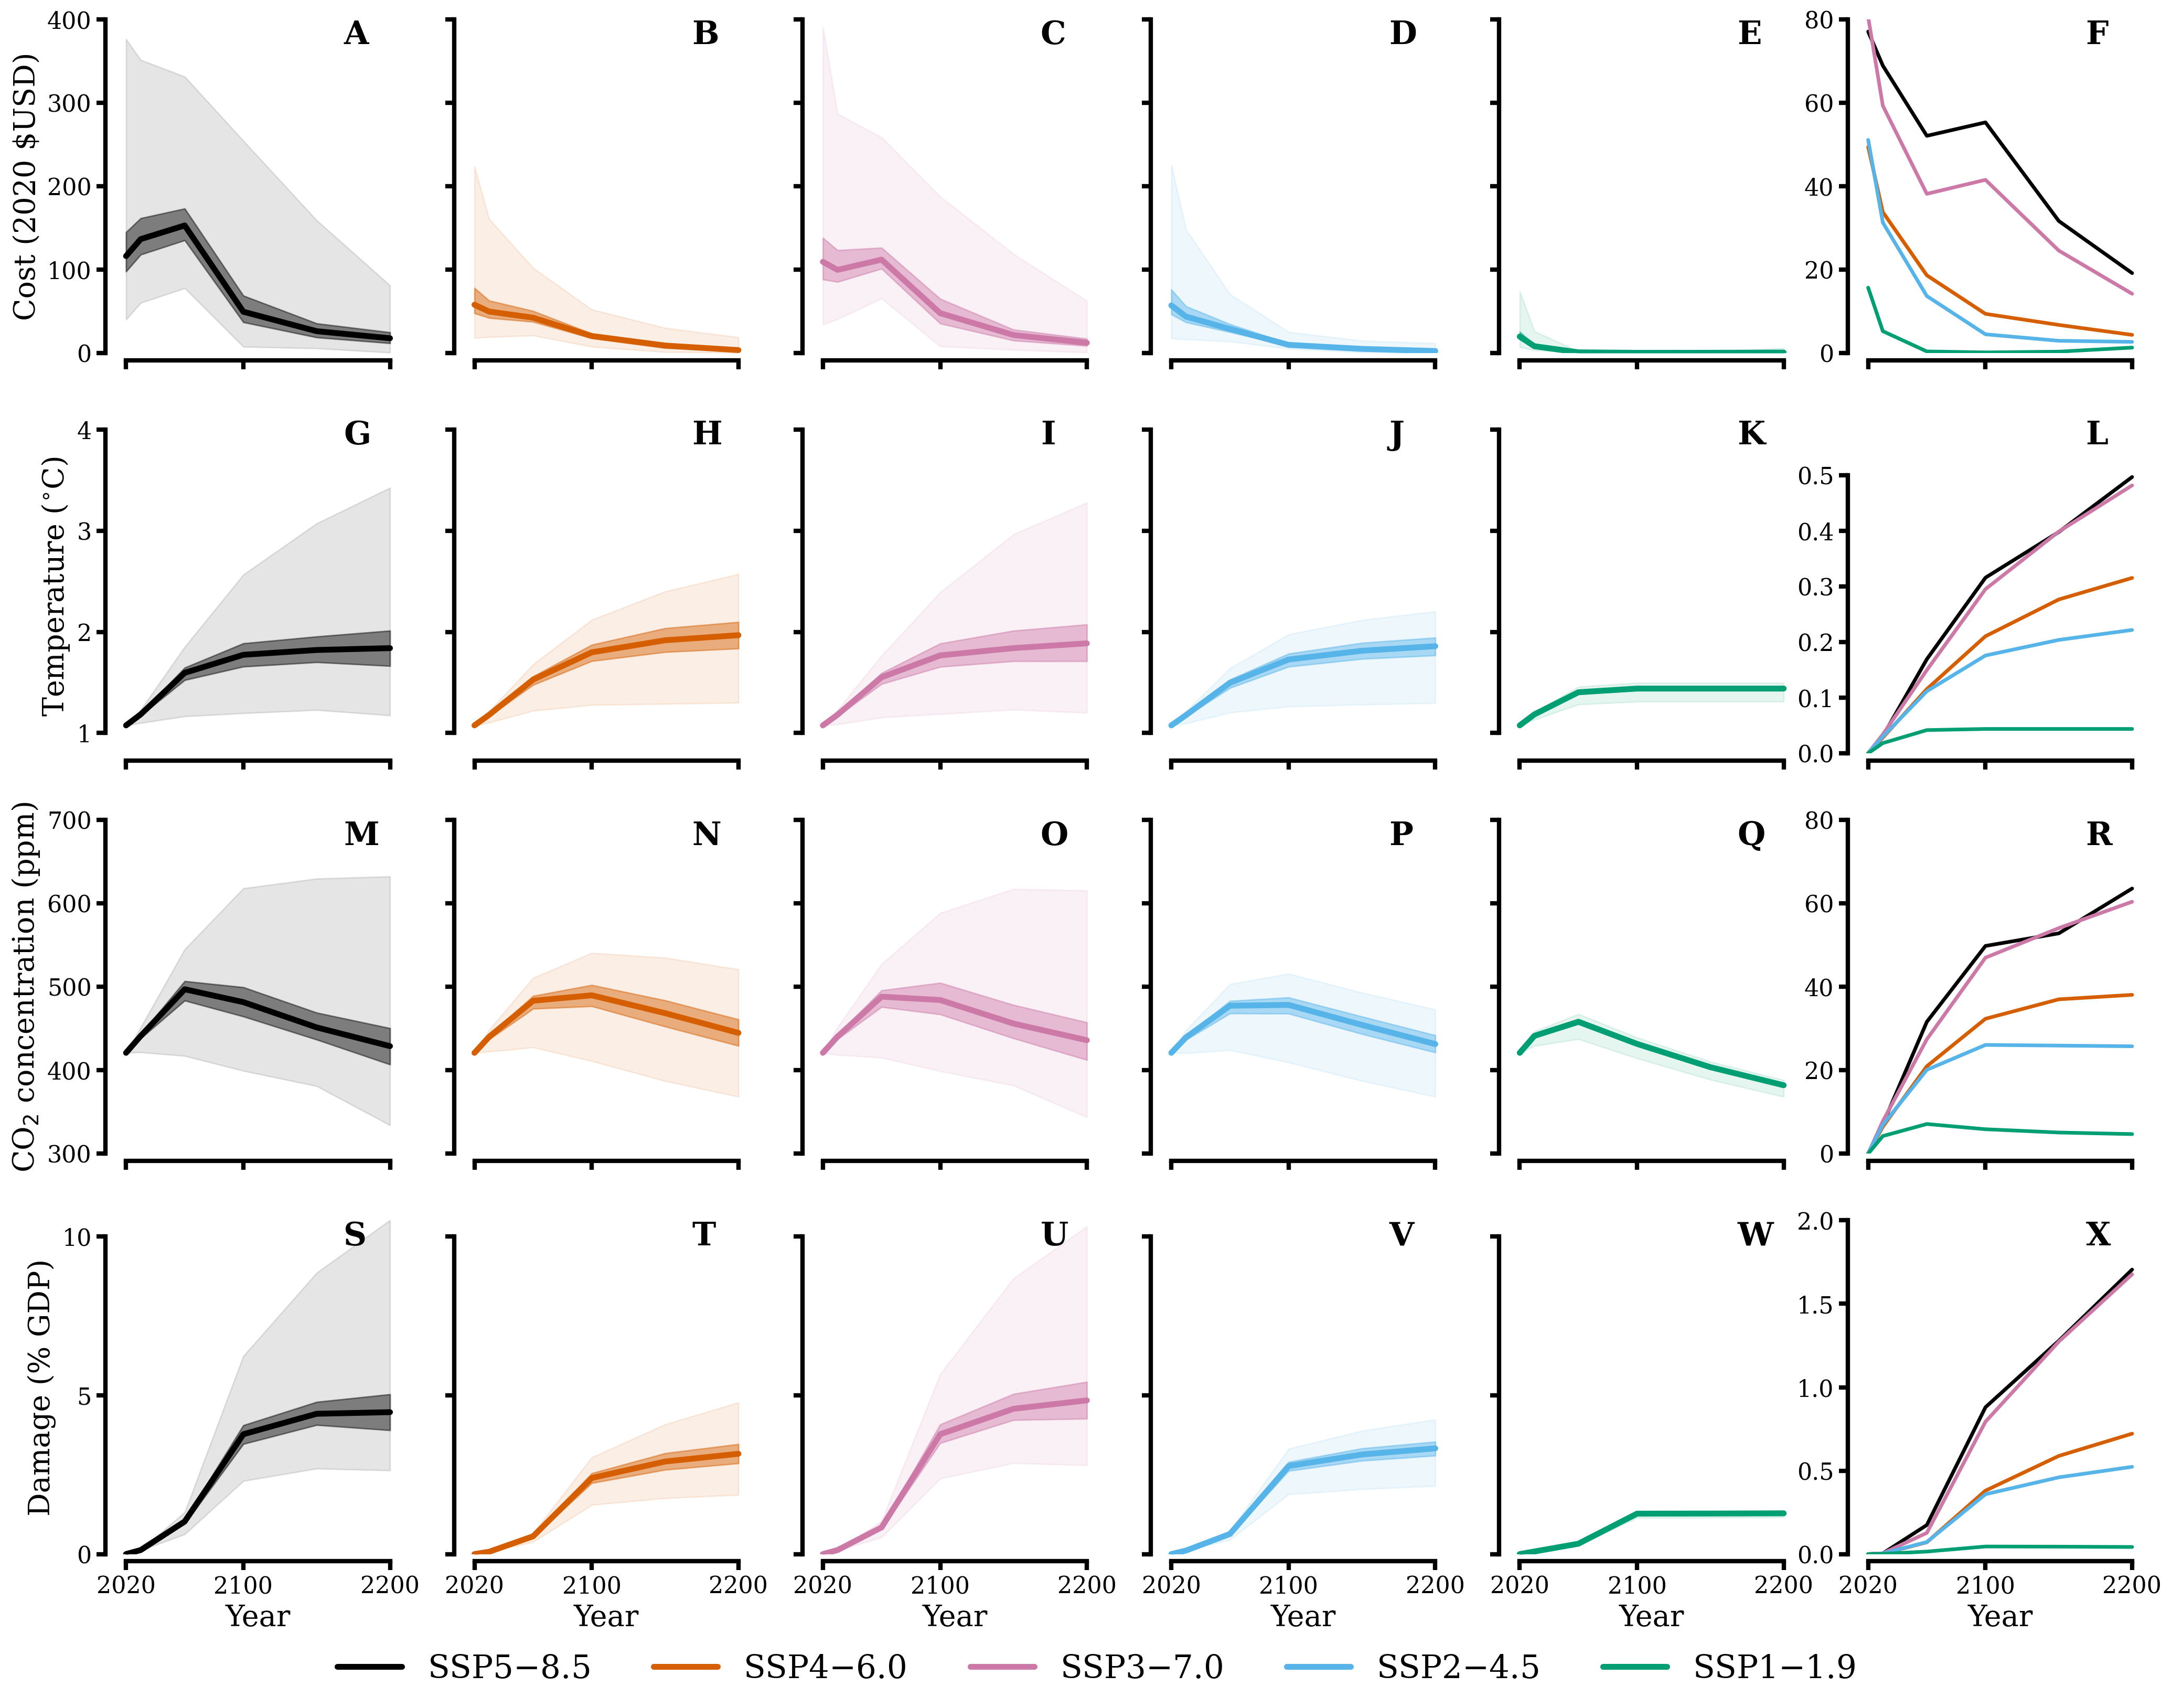

In [13]:
import matplotlib.transforms as mtransforms

bw = 4.5
lw = 1.5

ssp5_cind = 0
ssp4_cind = 6
ssp3_cind = 7
ssp2_cind = 2
ssp1_cind = 3
cinds = [ssp5_cind, ssp4_cind, ssp3_cind, ssp2_cind, ssp1_cind]

cost_row = ['A', 'B', 'C', 'D', 'E', 'F']
t_row = ['G', 'H', 'I', 'J', 'K', 'L']
conc_row = ['M', 'N', 'O', 'P', 'Q', 'R']
dam_row = ['S', 'T', 'U', 'V', 'W', 'X']

fig, ax = plt.subplot_mosaic([cost_row, t_row, conc_row, dam_row], sharex=True,
                             gridspec_kw={'height_ratios': [1, 1, 1, 1], 'width_ratios': [1, 1, 1, 1, 1, 1]},
                            figsize=(25,19))

ssp5, ssp4, ssp3, ssp2, ssp1 = make_row(ax, cost_row, ssp5_cpaths, ssp4_cpaths, ssp3_cpaths, ssp2_cpaths, ssp1_cpaths, 
         bw, lw, cinds, return_lines=True)

make_row(ax, t_row, ssp5_exp_T, ssp4_exp_T, ssp3_exp_T, ssp2_exp_T, ssp1_exp_T, 
         bw, lw, cinds, return_lines=True, dam=False, temp=True)

make_row(ax, conc_row, ssp5_exp_conc, ssp4_exp_conc, ssp3_exp_conc, ssp2_exp_conc, ssp1_exp_conc, 
         bw, lw, cinds, return_lines=True, dam=False, temp=False, conc=True)

make_row(ax, dam_row, ssp5_exp_dam, ssp4_exp_dam, ssp3_exp_dam, ssp2_exp_dam, ssp1_exp_dam, 
         bw, lw, cinds, return_lines=True, dam=True)

ax['A'].set_ylabel("Cost (2020 $USD)")
ax['G'].set_ylabel("Temperature ($^{\circ}$C)")
ax['M'].set_ylabel("CO$_2$ concentration (ppm)")
ax['S'].set_ylabel("Damage (% GDP)")

# turn off y labels
turn_off_ylabels = ['B', 'C', 'D', 'E', 'H', 'I', 'J', 'K', 'N', 'O', 'P', 'Q', 'T', 'U', 'V', 'W']
for i in turn_off_ylabels:
    ax[i].set_yticklabels([])
    
# make x axis label
for i in dam_row:
    ax[i].set_xlabel("Year")
    ax[i].set_xticklabels(['2020', '2100', '2200'])
    
    
for i in dam_row[:-1]:
    ax[i].set_yticks([0, 5, 10])
    
for i in t_row[:-1]:
    ax[i].set_yticks([1,2,3,4])
    
for i in conc_row[:-1]:
    ax[i].set_yticks([300, 400, 500, 600, 700])
    
for i in cost_row[:-1]:
    ax[i].set_yticks([0, 100, 200, 300, 400])

# label panels
for label, ax in ax.items():
    # label physical distance in and down:
    trans = mtransforms.ScaledTranslation(2.2, 0.0, fig.dpi_scale_trans)
    ax.text(0.0, 1.0, label, transform=ax.transAxes + trans, fontsize=22, fontweight='bold',
            verticalalignment='top', bbox=dict(facecolor='none', edgecolor='none', pad=1))
    
fig.legend([ssp5, ssp4, ssp3, ssp2, ssp1], ["SSP5$-$8.5", "SSP4$-$6.0", "SSP3$-$7.0", "SSP2$-$4.5", "SSP1$-$1.9"], bbox_to_anchor=(0.5, 0.03),
      loc='lower center', ncol=5, fancybox=True, shadow=True, fontsize=22)

sns.despine(offset=5, trim=True)

if save_figs:
    fig.savefig(''.join([basefile, "quartile-ensemble.png"]), dpi=400, bbox_inches="tight")    